# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

# Ingest Data  

In [113]:
df = pd.read_excel("World military power.xlsx", header=1)
pd.set_option('display.max_columns', None)
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

# EDA

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [115]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [116]:
df["country"] = df["Military Strength"]

In [117]:
df.drop(columns=["Military Strength", "Aircraft Strength", "Fighter/Interceptor Strength", "Attack Aircraft Strength", "Transport Aircraft Fleet Strength", "Trainer Aircraft Fleet" ], inplace=True)
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value,country
0,1.3444,260.0,0.0,25.0,30.0,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0,Afghanistan
1,2.3137,19.0,0.0,0.0,0.0,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0,Albania
2,0.4659,551.0,103.0,22.0,59.0,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0,Algeria
3,0.8379,295.0,72.0,18.0,30.0,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0,Angola
4,0.6521,227.0,24.0,7.0,9.0,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0,Argentina


In [118]:
df.drop(columns=["Helicopter Fleet Strength","Attack Helicopter Fleet Strength","Tank Strength", "AFV/APC Strength", "Self-Propelled Artillery Strength", "Towed Artillery Strength", \
                "Rocket Projector Strength","Navy Fleet Strengths", "Aircraft Carrier Fleet Strength", "Submarine Fleet Strength", "Destroyer Fleet Strength" ], inplace=True)

In [119]:
df.drop(columns=["Frigate Fleet Strength", "defense spending budget", "External Debt", "Airport Totals", "Oil Production", "Oil Consumption",\
                "Proven Oil Reserves", "Available Manpower", "Total Population", "Total Square Land Area",  "Total Coastline Coverage",\
                "Total Waterway Coverage", "Total Border Coverage"], inplace=True)
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,country
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0,Afghanistan
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0,Albania
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0,Algeria
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0,Angola
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0,Argentina


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

In [121]:
df.isnull().sum()

Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value                        0
Oil Production value              

In [122]:
df.loc[df["Navy Fleet Strengths value"].isnull(), ["Navy Fleet Strengths value"]] = 0.0

In [123]:
df.loc[df["Navy Fleet Strengths value"]==0.0, ["Submarine Fleet Strength value"]] = 0.0

In [124]:
df.loc[df["Navy Fleet Strengths value"]==0.0, ["Destroyer Fleet Strength value"]] = 0.0

In [125]:
df.loc[df["Navy Fleet Strengths value"]==0.0, ["Frigate Fleet Strength value"]] = 0.0

In [126]:
df.loc[df["Navy Fleet Strengths value"]==0.0, ["Aircraft Carrier Fleet Strength value"]] = 0.0

In [127]:
df.loc[df["Aircraft Carrier Fleet Strength value"].isnull(), "country"]

110    South Korea
Name: country, dtype: object

In [128]:
df.loc[df["Aircraft Carrier Fleet Strength value"].isnull(), "Aircraft Carrier Fleet Strength value"]= 0.0

In [129]:
df.loc[df["Submarine Fleet Strength value"].isnull(), "Submarine Fleet Strength value"] = 22

In [130]:
df.loc[df["Destroyer Fleet Strength value"].isnull(), "Destroyer Fleet Strength value"] = 12

In [131]:
df.loc[df["Frigate Fleet Strength value"].isnull(), "Frigate Fleet Strength value"] = 18

In [132]:
df.loc[df["Total Coastline Coverage value"].isnull() & (df["Navy Fleet Strengths value"])==0.0, "Total Coastline Coverage value"] = 0

In [133]:
df.loc[df["Total Coastline Coverage value"].isnull(), "country"]

14      Bolivia
63         Laos
93     Paraguay
103      Serbia
126      Uganda
Name: country, dtype: object

In [134]:
df.loc[df["Total Coastline Coverage value"].isnull(), "Total Coastline Coverage value"] = 0

In [135]:
df.drop(columns=["Total Population value", "Total Square Land Area value", "External Debt value", "Available Manpower value", "Total Waterway Coverage value",\
                 "Total Border Coverage value", "Total Coastline Coverage value"], inplace=True)
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,country
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000",43.0,0.0,5500.0,0.0,Afghanistan
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000",4.0,16000.0,42500.0,"16,83,00,000",Albania
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000",Algeria
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000",Angola
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000",Argentina


In [136]:
df.shape

(138, 24)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

## Fix the dtypes

In [138]:
df["defense spending budget value"] = df["defense spending budget value"].apply(lambda row: row.replace(",", ""))
df["defense spending budget value"]

0      12000000000
1        250000000
2      13000000000
3       7000000000
4       4200000000
          ...     
133      745000000
134     5500000000
135     1400000000
136       40000000
137      100000000
Name: defense spending budget value, Length: 138, dtype: object

In [139]:
df["defense spending budget value"] = df["defense spending budget value"].astype("int64")

In [140]:
df["Proven Oil Reserves value"] = df["Proven Oil Reserves value"].astype(str)

In [141]:
df["Proven Oil Reserves value"] = df["Proven Oil Reserves value"].apply(lambda row: row.replace(",", ""))
df["Proven Oil Reserves value"] 

0               0.0
1         168300000
2       12200000000
3        8273000000
4        2185000000
           ...     
133    300900000000
134      4400000000
135      3000000000
136             0.0
137             0.0
Name: Proven Oil Reserves value, Length: 138, dtype: object

In [142]:
df["Proven Oil Reserves value"] = df["Proven Oil Reserves value"].astype("float64")

In [143]:
df["Oil Production value"] = df["Oil Production value"].astype(str)

In [144]:
df["Oil Production value"] = df["Oil Production value"].apply(lambda row: row.replace(",", ""))

In [145]:
df["Oil Production value"] = df["Oil Production value"].astype("float64")

In [146]:
df["Oil Consumption value"] = df["Oil Consumption value"].astype(str)

In [147]:
df["Oil Consumption value"] = df["Oil Consumption value"].apply(lambda row: row.replace(",", ""))

In [148]:
df["Oil Consumption value"] = df["Oil Consumption value"].astype("float64")

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

In [41]:
df1 = df.copy()

In [150]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,country
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,43.0,0.0,5500.0,0.000000e+00,Afghanistan
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,4.0,16000.0,42500.0,1.683000e+08,Albania
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,157.0,1306000.0,325000.0,1.220000e+10,Algeria
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,176.0,1666000.0,82300.0,8.273000e+09,Angola
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,1138.0,479400.0,685000.0,2.185000e+09,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,444.0,2007000.0,575000.0,3.009000e+11,Venezuela
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,45.0,271400.0,525000.0,4.400000e+09,Vietnam
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,57.0,12260.0,145000.0,3.000000e+09,Yemen
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,88.0,0.0,21000.0,0.000000e+00,Zambia


In [ ]:
df.drop(columns="country", inplace=True)


In [153]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,43.0,0.0,5500.0,0.000000e+00
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,4.0,16000.0,42500.0,1.683000e+08
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,157.0,1306000.0,325000.0,1.220000e+10
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,176.0,1666000.0,82300.0,8.273000e+09
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,1138.0,479400.0,685000.0,2.185000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,444.0,2007000.0,575000.0,3.009000e+11
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,45.0,271400.0,525000.0,4.400000e+09
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,57.0,12260.0,145000.0,3.000000e+09
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,88.0,0.0,21000.0,0.000000e+00


## Visualy inspect the some features

In [154]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362319,0.304348,4.000000,1.710145,2.934783,1.399363e+10,290.043478,5.855524e+05,7.020187e+05,1.194412e+10
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821984,1.798656,12.631787,9.154954,6.057157,6.731189e+10,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+07,2.000000,0.000000e+00,2.000000e+03,0.000000e+00
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,3.255000e+08,33.500000,0.000000e+00,3.250000e+04,0.000000e+00
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,0.000000,0.000000,2.100909e+09,68.000000,1.313000e+04,1.335000e+05,8.028500e+07
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,0.000000,2.000000,0.000000,4.000000,6.957750e+09,150.750000,2.228600e+05,3.487500e+05,2.001500e+09
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,7.500000e+11,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11


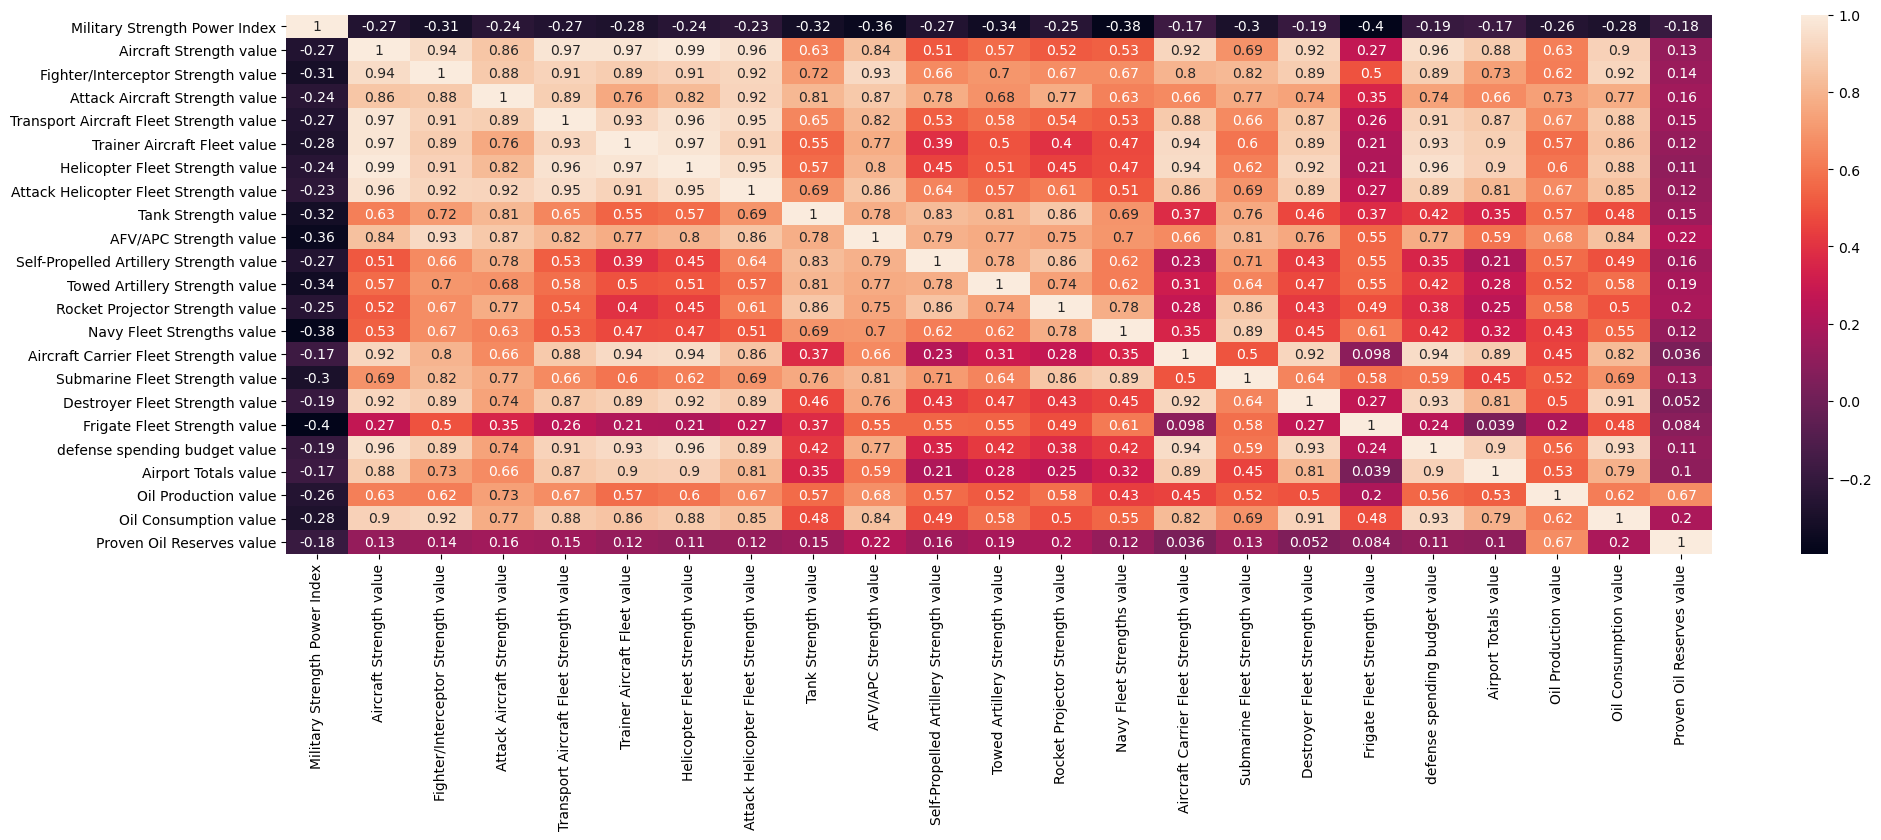

In [151]:
plt.figure(figsize = (23, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Scaling Data

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
scaler = StandardScaler()

In [157]:
X = df.copy()

In [158]:
scaled_X = scaler.fit_transform(X)

In [159]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [160]:
K_means_model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1,
       1, 0, 1, 1, 1, 1])

In [161]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [162]:
K_means_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1,
       1, 0, 1, 1, 1, 1])

In [163]:
X["Classes"] = K_means_model.labels_

In [164]:
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Classes
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,43.0,0.0,5500.0,0.000000e+00,1
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,4.0,16000.0,42500.0,1.683000e+08,1
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,157.0,1306000.0,325000.0,1.220000e+10,1
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,176.0,1666000.0,82300.0,8.273000e+09,1
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,1138.0,479400.0,685000.0,2.185000e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,444.0,2007000.0,575000.0,3.009000e+11,0
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,45.0,271400.0,525000.0,4.400000e+09,1
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,57.0,12260.0,145000.0,3.000000e+09,1
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,88.0,0.0,21000.0,0.000000e+00,1


## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [165]:
X = X.drop("Classes", axis =1)

In [56]:
pip install pyclustertend

  Using cached pyclustertend-1.7.0-py3-none-any.whl (7.2 kB)
Note: you may need to restart the kernel to use updated packages.


In [166]:
from pyclustertend import hopkins

In [167]:
X.shape

(138, 23)

In [168]:
hopkins(X, X.shape[0])

0.048995408969360506

In [169]:
hopkins(X, 60)

0.01567052355778617

## Clustering with K-means

In [170]:
ssd = []

K = range(2,10)                                          

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)                                        
    ssd.append(model.inertia_)

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

Text(0.5, 1.0, 'elbow method')

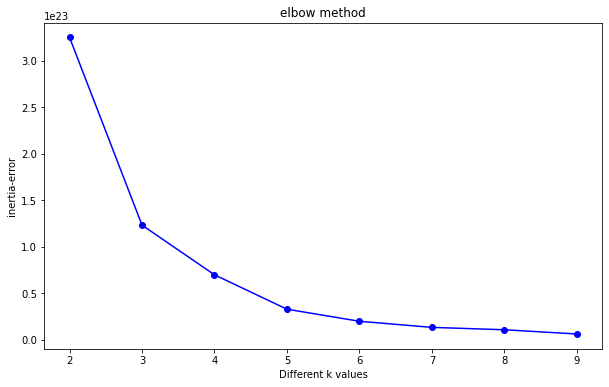

In [171]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [172]:
pd.Series(ssd).diff()

0             NaN
1   -2.018161e+23
2   -5.337088e+22
3   -3.699291e+22
4   -1.297433e+22
5   -6.557118e+21
6   -2.558550e+21
7   -4.536032e+21
dtype: float64

In [173]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,2.018161e+23
3,5.337088e+22
4,3.699291e+22
5,1.297433e+22
6,6.557118e+21
7,2.558550e+21
8,4.536032e+21


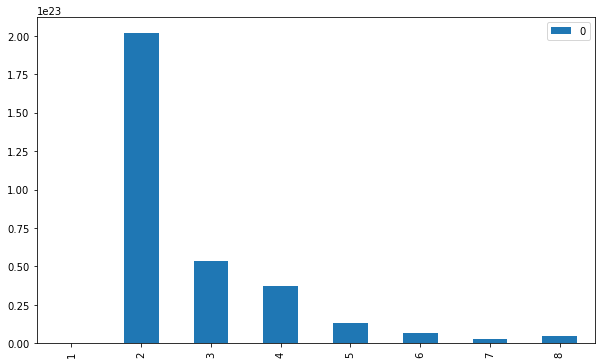

In [174]:
df_diff.plot(kind='bar');

In [175]:
from sklearn.metrics import silhouette_score

In [176]:
silhouette_score(X, K_means_model.labels_)

0.8727136449408568

In [177]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9492987493260252
For n_clusters=3, the silhouette score is 0.8769210817656808
For n_clusters=4, the silhouette score is 0.884679923492908
For n_clusters=5, the silhouette score is 0.8727136449408568
For n_clusters=6, the silhouette score is 0.7773345516854772
For n_clusters=7, the silhouette score is 0.781696882850395
For n_clusters=8, the silhouette score is 0.7718446763874915


### Model Building and label visualisation

In [178]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0])

In [179]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0])

In [180]:
clusters = model.labels_

In [181]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,43.0,0.0,5500.0,0.000000e+00
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,4.0,16000.0,42500.0,1.683000e+08
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,157.0,1306000.0,325000.0,1.220000e+10
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,176.0,1666000.0,82300.0,8.273000e+09
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,1138.0,479400.0,685000.0,2.185000e+09


In [182]:
X["predicted_clusters"] = clusters

In [183]:
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,predicted_clusters
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,43.0,0.0,5500.0,0.000000e+00,0
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,4.0,16000.0,42500.0,1.683000e+08,0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,157.0,1306000.0,325000.0,1.220000e+10,0
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,176.0,1666000.0,82300.0,8.273000e+09,0
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,1138.0,479400.0,685000.0,2.185000e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,444.0,2007000.0,575000.0,3.009000e+11,2
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,45.0,271400.0,525000.0,4.400000e+09,0
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,57.0,12260.0,145000.0,3.000000e+09,0
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,88.0,0.0,21000.0,0.000000e+00,0


In [81]:
a = df1["country"]
a

0      Afghanistan
1          Albania
2          Algeria
3           Angola
4        Argentina
          ...     
133      Venezuela
134        Vietnam
135          Yemen
136         Zambia
137       Zimbabwe
Name: country, Length: 138, dtype: object

In [84]:
a.to_csv("label.csv", index=False)

In [184]:
labels = pd.read_csv("label.csv")
labels

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


In [185]:
X["labels"] = labels

In [186]:
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,predicted_clusters,labels
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,43.0,0.0,5500.0,0.000000e+00,0,Afghanistan
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,4.0,16000.0,42500.0,1.683000e+08,0,Albania
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,157.0,1306000.0,325000.0,1.220000e+10,0,Algeria
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,176.0,1666000.0,82300.0,8.273000e+09,0,Angola
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,1138.0,479400.0,685000.0,2.185000e+09,0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,444.0,2007000.0,575000.0,3.009000e+11,2,Venezuela
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,45.0,271400.0,525000.0,4.400000e+09,0,Vietnam
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,57.0,12260.0,145000.0,3.000000e+09,0,Yemen
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,88.0,0.0,21000.0,0.000000e+00,0,Zambia


In [187]:
ct = pd.crosstab(X.predicted_clusters, X.labels)
ct

labels,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Croatia,Cuba,Czechia,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Honduras,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Lithuania,Madagascar,Malaysia,Mali,Mauritania,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Romania,Russia,Saudi Arabia,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
predicted_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


### Evaluate 

## Hierarchical Clustering

In [194]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,43.0,0.0,5500.0,0.000000e+00
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,4.0,16000.0,42500.0,1.683000e+08
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,157.0,1306000.0,325000.0,1.220000e+10
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,176.0,1666000.0,82300.0,8.273000e+09
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,1138.0,479400.0,685000.0,2.185000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,444.0,2007000.0,575000.0,3.009000e+11
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,45.0,271400.0,525000.0,4.400000e+09
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,57.0,12260.0,145000.0,3.000000e+09
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,88.0,0.0,21000.0,0.000000e+00


## Scaling Data

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler = StandardScaler()

In [197]:
X = df.copy()

In [198]:
scaled_X = scaler.fit_transform(X)

In [199]:
hopkins(X, X.shape[0])

0.042976199572397615

### Dendogram

In [200]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [201]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

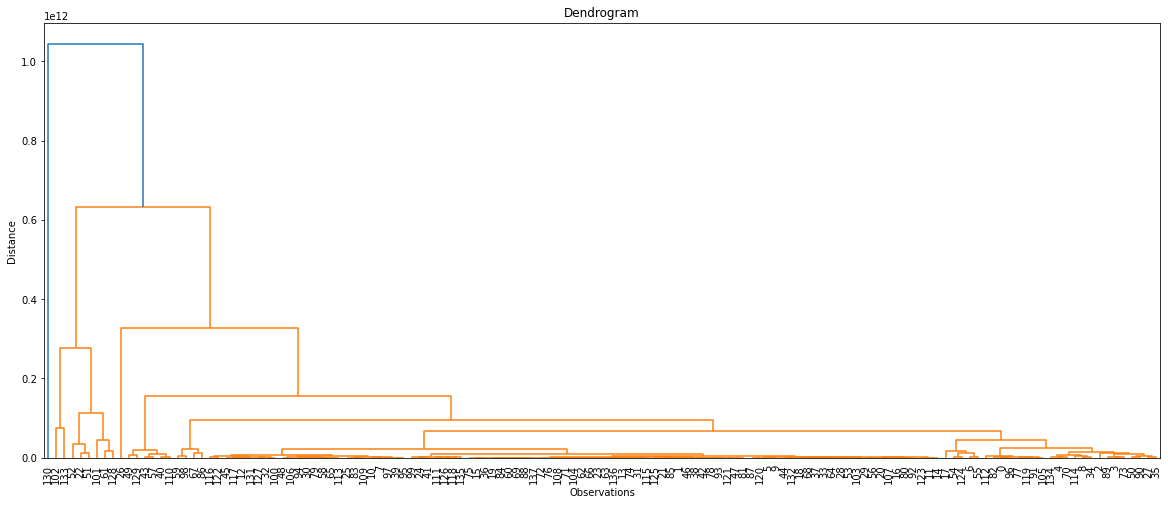

In [202]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10); 

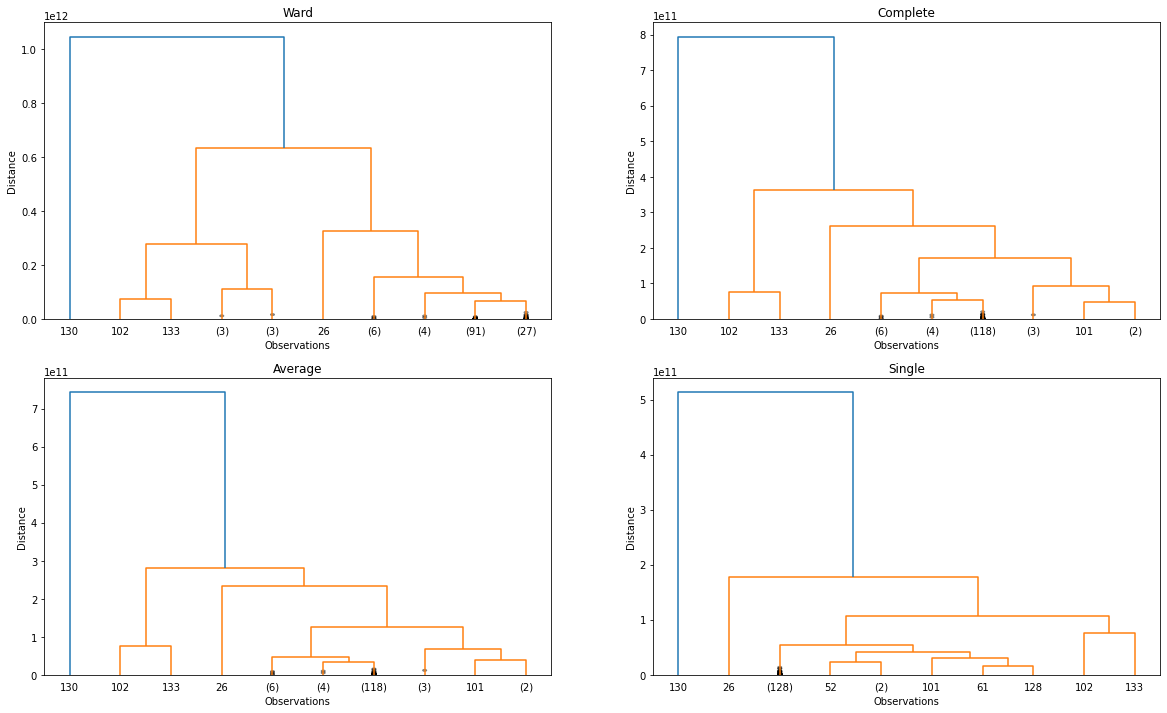

In [215]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Model Building and label visualisation

In [204]:
from sklearn.cluster import AgglomerativeClustering

In [205]:
from sklearn.metrics import silhouette_score

In [206]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.9492987493260252
Silhouette Score for 3 clusters: 0.8733831121114958
Silhouette Score for 4 clusters: 0.8819873989338826
Silhouette Score for 5 clusters: 0.8727136449408568
Silhouette Score for 6 clusters: 0.7917402311906254
Silhouette Score for 7 clusters: 0.7920281312281765
Silhouette Score for 8 clusters: 0.7826624642444961
Silhouette Score for 9 clusters: 0.7763981316728114


In [207]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0], dtype=int64)

In [208]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0], dtype=int64)

In [209]:
clusters = model1.labels_

In [210]:
labels = pd.read_csv("label.csv")
labels

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


In [211]:
X["predicted_clusters"] = clusters
X["labels"] = labels
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,predicted_clusters,labels
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,43.0,0.0,5500.0,0.000000e+00,0,Afghanistan
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,4.0,16000.0,42500.0,1.683000e+08,0,Albania
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,157.0,1306000.0,325000.0,1.220000e+10,0,Algeria
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,176.0,1666000.0,82300.0,8.273000e+09,0,Angola
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,1138.0,479400.0,685000.0,2.185000e+09,0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,600.0,73.0,104.0,36.0,49.0,0.0,2.0,0.0,4.0,745000000,444.0,2007000.0,575000.0,3.009000e+11,2,Venezuela
134,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,2530.0,70.0,1000.0,85.0,65.0,0.0,6.0,0.0,9.0,5500000000,45.0,271400.0,525000.0,4.400000e+09,0,Vietnam
135,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,615.0,20.0,85.0,150.0,30.0,0.0,0.0,0.0,0.0,1400000000,57.0,12260.0,145000.0,3.000000e+09,0,Yemen
136,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,184.0,0.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,40000000,88.0,0.0,21000.0,0.000000e+00,0,Zambia


In [212]:
ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct

labels,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Croatia,Cuba,Czechia,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Honduras,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Lithuania,Madagascar,Malaysia,Mali,Mauritania,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Romania,Russia,Saudi Arabia,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
predicted_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
